In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load lite results from log file

In [23]:
import ast

test_log = pd.read_excel('results/df/test_log.xlsx').drop(['Unnamed: 0'],axis=1)
test_log['n_features'] = [len(ast.literal_eval(item)) for item in test_log['features']]
test_log.round(3).tail()

,auto_train,added_features,oversample,features,train_size,robustness_iterations,results_df,accuracy,recall,selectivity,precision,NPV,FNR,F1_measure,n_features
342,1,2,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df342,0.715,0.646,0.749,0.554,0.815,0.354,0.593,2
343,1,4,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df343,0.712,0.644,0.745,0.545,0.816,0.356,0.587,2
344,1,8,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df344,0.712,0.655,0.740,0.545,0.820,0.345,0.590,2
345,1,16,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df345,0.717,0.655,0.748,0.552,0.821,0.345,0.596,2
346,1,32,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df346,0.713,0.663,0.738,0.551,0.820,0.337,0.598,2


#### Ever-changing part

In [26]:
query = {
    'auto_train': True,
    'oversample': True,
    'features': "['ejection_fraction', 'serum_creatinine']"
}
query_str = ''
for key in query.keys():
    query_str = query_str + f'{key} == @query["{key}"] & ' 
query_str = query_str[:-2]

test_log_sorted = test_log.query(query_str).sort_values(by=['added_features'],ascending=True).round(3)
test_log_sorted = test_log_sorted.drop(205)
test_log_sorted

,auto_train,added_features,oversample,features,train_size,robustness_iterations,results_df,accuracy,recall,selectivity,precision,NPV,FNR,F1_measure,n_features
341,1,1,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df341,0.709,0.638,0.745,0.545,0.813,0.362,0.582,2
342,1,2,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df342,0.715,0.646,0.749,0.554,0.815,0.354,0.593,2
343,1,4,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df343,0.712,0.644,0.745,0.545,0.816,0.356,0.587,2
344,1,8,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df344,0.712,0.655,0.740,0.545,0.820,0.345,0.590,2
345,1,16,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df345,0.717,0.655,0.748,0.552,0.821,0.345,0.596,2
346,1,32,1,"['ejection_fraction', 'serum_creatinine']",0.66,100,df346,0.713,0.663,0.738,0.551,0.820,0.337,0.598,2


<AxesSubplot:xlabel='added_features', ylabel='recall'>

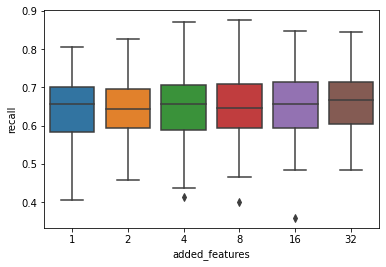

In [42]:
fig,ax = plt.subplots()

df_plot = pd.DataFrame()

for added_features,df in test_log_sorted.groupby('added_features'):
    df_path = f'results/df/{df.results_df.values[0]}.pkl'
    df_plot[str(added_features)] = pd.read_pickle(df_path)['recall']

sns.boxplot(x="added_features", y="recall",
            data=pd.melt(df_plot).rename(columns={'variable': 'added_features', 'value': 'recall'}))